# Import necessary packages

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare the dataset
1. Load the dataset into a DataFrame named df_data.
2. Drop the name column. This column is not a feature required by the model.
3. Create a DataFrame named X containing all the columns except the status.
4. Create a DataFrame named y containing the status.

In [3]:
url = 'parkinsons.data'
df_data = pd.read_csv(url)

In [4]:
df_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df_data.drop(columns='name', inplace=True)

In [6]:
#df_data.head()

In [7]:
X = df_data.drop(columns='status')

In [8]:
y = df_data['status']

# Split the dataset into a training set and a test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

#  Create the model
1. Instantiate a logistic regression classifier with an lbfgs solver and penalty set to none.
2. Fit the classifier to the data.
3. If the algorithm fails to converge, what can you change to fix that?

In [13]:
model = LogisticRegression(solver='lbfgs', random_state=2,max_iter=1000, penalty='none')

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none', random_state=2)

If the algorithm fails to converge, increase the iterations. 

# Calculate accuracy
Calculate and print the accuracy of the model on the test data.

In [15]:
model.score(X_train, y_train)

0.8561643835616438

In [16]:
model.score(X_test, y_test)

0.7755102040816326

# L2 regularization
Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [18]:
model_regularized = LogisticRegression(solver='lbfgs', random_state=2,max_iter=1000, penalty='l2')

In [19]:
model_regularized.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [20]:
model_regularized.score(X_train, y_train)

0.8767123287671232

In [21]:
model_regularized.score(X_test, y_test)

0.8571428571428571

# Choose the C parameter
Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.05. Plot a graph to show the accuracy of the test data versus the accuracy of the training data. Select an appropriate value for C and explain why that may be the best value.

In [24]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  model_iter = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  model_iter.fit(X_train, y_train)
  test_accuracy.append(model_iter.score(X_test, y_test))
  train_accuracy.append(model_iter.score(X_train, y_train))

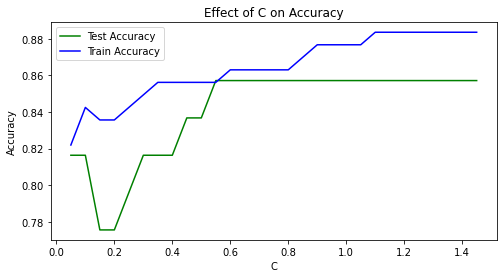

In [25]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

The Accuracy of test and training converge at about .58, so I would use that C value. 